/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


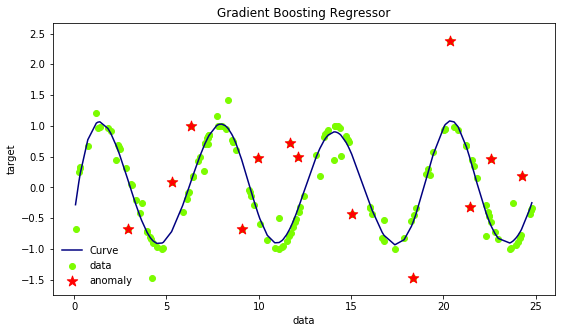

In [2]:
##Example

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

X = np.sort(25 * np.random.rand(150, 1), axis=0)

y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - np.random.rand(30))      

from sklearn.svm import SVR     
model = SVR(kernel='rbf', C=1e3, gamma=.1)
y_rbf = model.fit(X, y).predict(X)

## 98% Confidence Interval

error=y_rbf-y
sup=np.mean(error)+2.33*np.std(error)
inf=np.mean(error)-2.33*np.std(error)
anomalies=np.concatenate([np.where(error>sup)[0],np.where(error<inf)[0]])

lw = 3
plt.figure(figsize=(9,5))
plt.scatter(X, y, color='lawngreen', label='data')
plt.scatter(X[anomalies], y[anomalies], marker='*',color='red', label='anomaly',s=120)
plt.hold('on')
plt.plot(X, y_rbf, color='navy', label='Curve')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Gradient Boosting Regressor')
plt.legend(loc=3,frameon=False)
plt.show()

In [0]:

y[::5] += 3 * (0.5 - np.random.rand(30))

In [0]:
X=np.array([1,2,3,2,3,1,1,1,1,4,3,2,5,3,2,65,77,111,45,20,5,3,2,3,2,2,2,1,1,3,4,4,3,4,4,5,1,4,5,4,3,2,4,5,58,65,123,54,42,30,5,2,4,5])
X=X.reshape(-1,1)


def anomalyDetector(X, test_point):
    # Remove the max %5 of data points
    # Remove the min %5 of data points
    df = pd.DataFrame(X)
    qmin, qmax = float(df.quantile(.05)), float(df.quantile(.95))
    X = X[(X >= qmin) & (X <= qmax)]
    
    m , s = X.mean(), X.std()
    return np.abs(test_point - m) > 3 * s
  

In [44]:
anomalyDetector(X, test_point = 100)

True

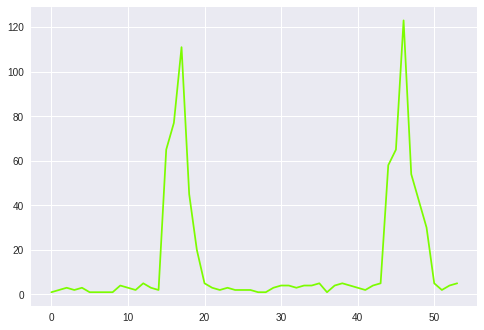

In [45]:
plt.plot(X, color='lawngreen', label='data')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


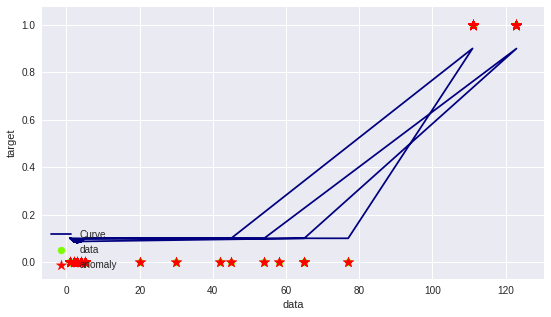

In [23]:
##google trends darbe datasına benzer bir data
X=np.array([1,2,3,2,3,1,1,1,1,4,3,2,5,3,2,65,77,111,45,20,5,3,2,3,2,2,2,1,1,3,4,4,3,4,4,5,1,4,5,4,3,2,4,5,58,65,123,54,42,30,5,2,4,5])
X=X.reshape(-1,1)

m , s = X.mean(), X.std()
y=np.abs(X - m) > 3 * s

from sklearn.svm import SVR     
model = SVR(kernel='rbf', C=1e3, gamma=.1)
y_rbf = model.fit(X, y).predict(X)

## 98% Confidence Interval

error=y_rbf-y
sup=np.mean(error)+2.33*np.std(error)
inf=np.mean(error)-2.33*np.std(error)
anomalies=np.concatenate([np.where(error>sup)[0],np.where(error<inf)[0]])

lw = 3
plt.figure(figsize=(9,5))
plt.scatter(X, y, color='lawngreen', label='data')
plt.scatter(X[anomalies], y[anomalies], marker='*',color='red', label='anomaly',s=120)
plt.hold('on')
plt.plot(X, y_rbf, color='navy', label='Curve')
plt.xlabel('data')
plt.ylabel('target')
plt.legend(loc=3,frameon=False)
plt.show()

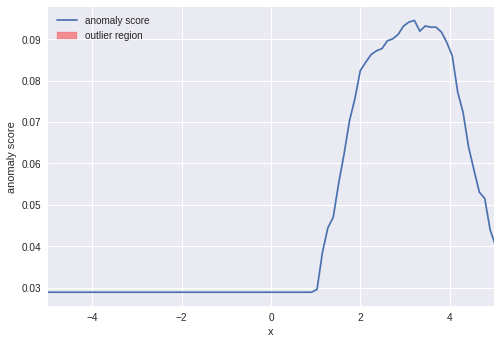

In [15]:
##google trends darbe datasına benzer bir data
X=np.array([1,2,3,2,3,1,1,1,1,4,3,2,5,3,2,65,77,111,45,20,5,3,2,3,2,2,2,1,1,3,4,4,3,4,4,5,1,4,5,4,3,2,4,5,58,65,123,54,42,30,5,2,4,5])
X=X.reshape(-1,1)


from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(X.reshape(-1, 1))


xx = np.linspace(-6, 6, 100).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

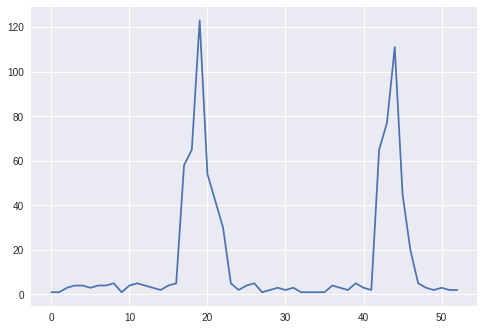

In [22]:
X=np.array([1,1,3,4,4,3,4,4,5,1,4,5,4,3,2,4,5,58,65,123,54,42,30,5,2,4,5,1,2,3,2,3,1,1,1,1,4,3,2,5,3,2,65,77,111,45,20,5,3,2,3,2,2])
X=X.reshape(-1,1)

plt.plot(X)

In [0]:
##google trends darbe datasına benzer bir data
X=np.array([1,1,3,4,4,3,4,4,5,1,4,5,4,3,2,4,5,58,65,123,54,42,30,5,2,4,5,1,2,3,2,3,1,1,1,1,4,3,2,5,3,2,65,77,111,45,20,5,3,2,3,2,2])
X=X.reshape(-1,1)

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(X)
y=isolation_forest.predict(X)

In [0]:
error=y-X
sup=np.mean(error)+2.33*np.std(error)
inf=np.mean(error)-2.33*np.std(error)
anomalies=np.concatenate([np.where(error>sup)[0],np.where(error<inf)[0]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


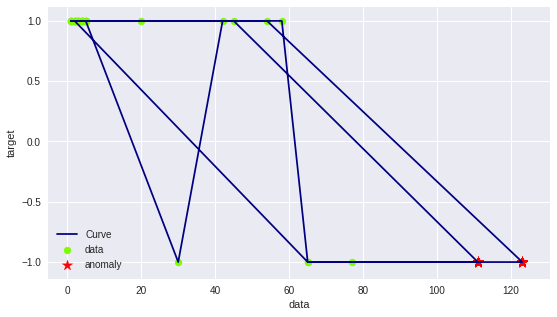

In [49]:
lw = 3
plt.figure(figsize=(9,5))
plt.scatter(X, y, color='lawngreen', label='data')
plt.scatter(X[anomalies], y[anomalies], marker='*',color='red', label='anomaly',s=120)
plt.hold('on')
plt.plot(X, y, color='navy', label='Curve')
plt.xlabel('data')
plt.ylabel('target')

plt.legend(loc=3,frameon=False)
plt.show()